--- Part 1: Hyperparameter Tuning with Grid Search ---

Dataset Features (X) shape: (150, 4)
Dataset Labels (y) shape: (150,)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']

Training set size: 105 samples
Test set size: 45 samples

Features standardized.

Hyperparameter grid defined:
 C: [0.1, 1, 10, 100]
 gamma: [1, 0.1, 0.01, 0.001]
 kernel: ['rbf', 'linear']

Starting Grid Search with 5-fold Cross-Validation...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Grid Search completed.

Best hyperparameters found: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9810

Test set accuracy with tuned model: 0.9111

--- Classification Report for Tuned Model ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80

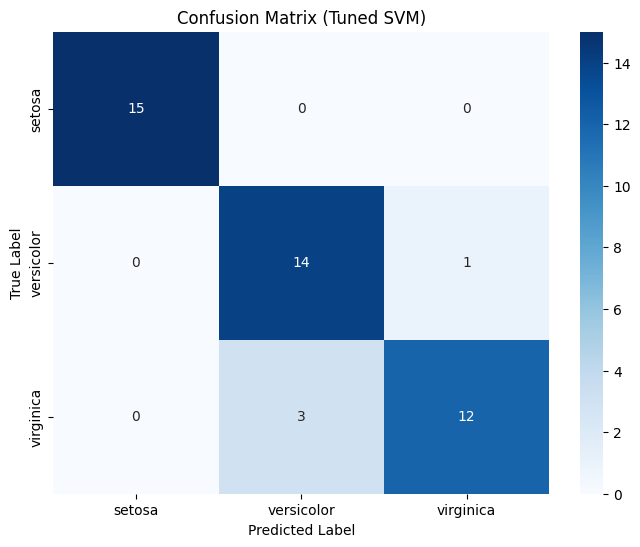


--- Top 5 Grid Search Results ---
    param_C  param_gamma param_kernel  mean_test_score  rank_test_score
10      1.0        0.100          rbf         0.980952                1
27    100.0        0.100       linear         0.980952                1
31    100.0        0.001       linear         0.980952                1
29    100.0        0.010       linear         0.980952                1
25    100.0        1.000       linear         0.980952                1

--- Part 2: Cross-Validation Techniques (k-fold) ---

Performing 5-fold cross-validation...

Cross-validation scores for each fold: [1.         0.95238095 0.95238095 0.95238095 1.        ]
Mean cross-validation accuracy: 0.9714
Standard deviation of cross-validation accuracy: 0.0233


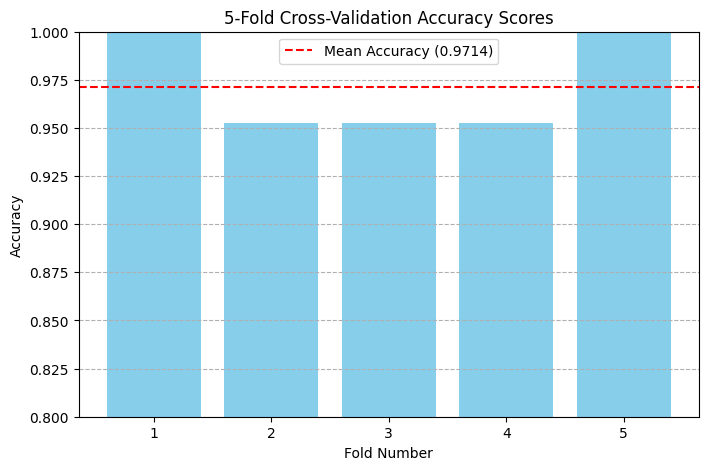

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris  # Classic dataset for classification
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# --- Part 1: Hyperparameter Tuning with Grid Search ---

print("--- Part 1: Hyperparameter Tuning with Grid Search ---")

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"\nDataset Features (X) shape: {X.shape}")
print(f"Dataset Labels (y) shape: {y.shape}")
print(f"Feature Names: {feature_names}")
print(f"Target Names: {target_names}")

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures standardized.")

# Define the Model and Hyperparameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Kernel type
}

print("\nHyperparameter grid defined:")
for param, values in param_grid.items():
    print(f" {param}: {values}")

# Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

print("\nStarting Grid Search with 5-fold Cross-Validation...")
grid_search.fit(X_train_scaled, y_train)
print("\nGrid Search completed.")

# Best Parameters and Score
print(f"\nBest hyperparameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate Best Model on Test Set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)

test_accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTest set accuracy with tuned model: {test_accuracy_tuned:.4f}")

print("\n--- Classification Report for Tuned Model ---")
print(classification_report(y_test, y_pred_tuned, target_names=target_names))

print("\n--- Confusion Matrix for Tuned Model ---")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_tuned,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names
)
plt.title('Confusion Matrix (Tuned SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize Grid Search Results (optional)
results_df = pd.DataFrame(grid_search.cv_results_)
print("\n--- Top 5 Grid Search Results ---")
print(
    results_df[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score', 'rank_test_score']]
    .sort_values(by='rank_test_score')
    .head()
)

# --- Part 2: Cross-Validation Techniques (k-fold) ---

print("\n--- Part 2: Cross-Validation Techniques (k-fold) ---")

# Instantiate a Model (default parameters)
model_cv = SVC(random_state=42)

# Define k-fold Cross-Validation Strategy
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

print(f"\nPerforming {k_folds}-fold cross-validation...")

# Perform Cross-Validation and Get Scores
cv_scores = cross_val_score(model_cv, X_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f"\nCross-validation scores for each fold: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores):.4f}")

# Visualize Cross-Validation Scores
plt.figure(figsize=(8, 5))
plt.bar(range(1, k_folds + 1), cv_scores, color='skyblue')
plt.axhline(
    y=np.mean(cv_scores),
    color='r',
    linestyle='--',
    label=f'Mean Accuracy ({np.mean(cv_scores):.4f})'
)
plt.title(f'{k_folds}-Fold Cross-Validation Accuracy Scores')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()
